# Missing value imputation: CategoricalImputer

Examples on how to use the missing values imputers available in Feature-engine.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


This imputer works only for categorical variables. It replaces the NA by the arbitrary label "Missing" or a by the most frequent category.

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import feature_engine.imputation as mdi

In [6]:
import feature_engine 
feature_engine.__version__

'1.0.0'

In [7]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [9]:
X_train[['Alley', 'MasVnrType']].isnull().mean()

Alley         0.939335
MasVnrType    0.004892
dtype: float64

<AxesSubplot:>

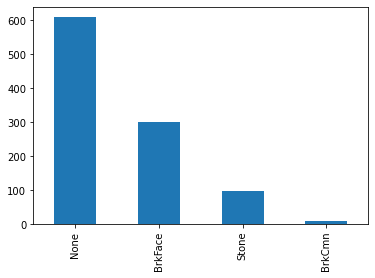

In [19]:
X_train['MasVnrType'].value_counts().plot.bar()

In [20]:
addLabel_imputer = mdi.CategoricalImputer(variables=['Alley', 'MasVnrType'])

addLabel_imputer.fit(X_train)

CategoricalImputer(variables=['Alley', 'MasVnrType'])

In [21]:
train_t = addLabel_imputer.transform(X_train)
test_t = addLabel_imputer.transform(X_test)

<AxesSubplot:>

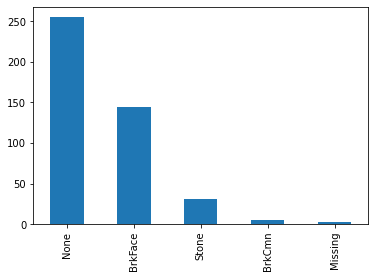

In [22]:
# we can observe in the below plot, the presence of a new category, where before there were NA
test_t['MasVnrType'].value_counts().plot.bar()

<AxesSubplot:>

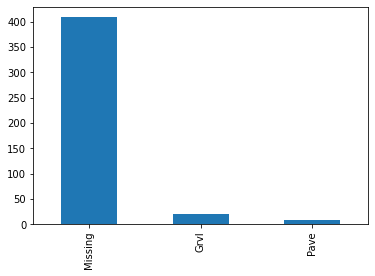

In [23]:
test_t['Alley'].value_counts().plot.bar()

## FrequentCategoryImputer

The FrequentCategoryImputer works only with categorical variables. It replaces the NA by the most frequent label, this is by the most popular label in the dataset, for a specific variable.

In [24]:
frequentLabel_imputer = mdi.CategoricalImputer(imputation_method='frequent', variables='MasVnrType')

frequentLabel_imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent', variables=['MasVnrType'])

In [25]:
frequentLabel_imputer.imputer_dict_

{'MasVnrType': 'None'}

In [26]:
train_t = frequentLabel_imputer.transform(X_train)
test_t = frequentLabel_imputer.transform(X_test)

train_t['MasVnrType'].value_counts()

None       614
BrkFace    301
Stone       97
BrkCmn      10
Name: MasVnrType, dtype: int64

See how the number of observations for None in MasVnrType has increased from 864 to 872, thanks to replacing the NA with this label in the dataset.

### Automatically select categorical variables

When no variable list is passed when calling the imputer, all categorical variables will be selected by the imputer

In [29]:
frequentLabel_imputer = mdi.CategoricalImputer()
frequentLabel_imputer.fit(X_train)
frequentLabel_imputer.imputer_dict_

{'MSZoning': 'Missing',
 'Street': 'Missing',
 'Alley': 'Missing',
 'LotShape': 'Missing',
 'LandContour': 'Missing',
 'Utilities': 'Missing',
 'LotConfig': 'Missing',
 'LandSlope': 'Missing',
 'Neighborhood': 'Missing',
 'Condition1': 'Missing',
 'Condition2': 'Missing',
 'BldgType': 'Missing',
 'HouseStyle': 'Missing',
 'RoofStyle': 'Missing',
 'RoofMatl': 'Missing',
 'Exterior1st': 'Missing',
 'Exterior2nd': 'Missing',
 'MasVnrType': 'Missing',
 'ExterQual': 'Missing',
 'ExterCond': 'Missing',
 'Foundation': 'Missing',
 'BsmtQual': 'Missing',
 'BsmtCond': 'Missing',
 'BsmtExposure': 'Missing',
 'BsmtFinType1': 'Missing',
 'BsmtFinType2': 'Missing',
 'Heating': 'Missing',
 'HeatingQC': 'Missing',
 'CentralAir': 'Missing',
 'Electrical': 'Missing',
 'KitchenQual': 'Missing',
 'Functional': 'Missing',
 'FireplaceQu': 'Missing',
 'GarageType': 'Missing',
 'GarageFinish': 'Missing',
 'GarageQual': 'Missing',
 'GarageCond': 'Missing',
 'PavedDrive': 'Missing',
 'PoolQC': 'Missing',
 'Fenc